In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv('train.csv')

In [8]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Missing Value

In [9]:
feature_with_nan = [feature for feature in df.columns if df[feature].isnull().sum() > 0]
print(f"Total number of features containing null values are: {len(feature_with_nan)}")
print(feature_with_nan)

Total number of features containing null values are: 3
['Age', 'Cabin', 'Embarked']


In [10]:
df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [11]:
df['Sex'].replace({
    'male' : 1,
    'female' : 0
}, inplace=True)

Checking is null values are important with respect to the target label

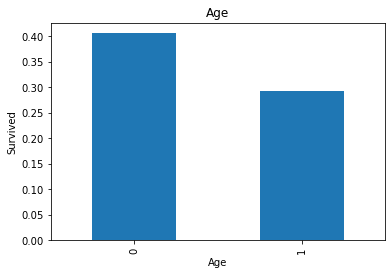

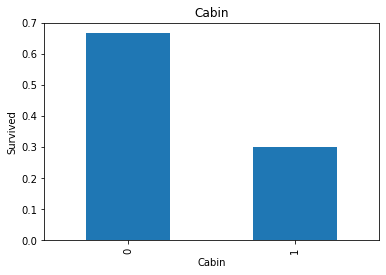

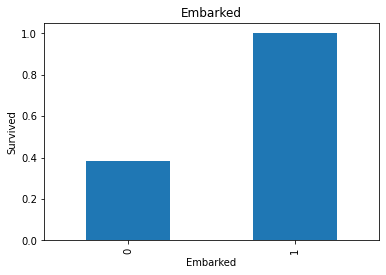

In [12]:
for feature in feature_with_nan:
    data = df.copy()
    
    data[feature] = np.where(data[feature].isnull(), 1, 0)
    data.groupby(feature)['Survived'].mean().plot.bar()
    plt.xlabel(feature)
    plt.ylabel("Survived")
    plt.title(feature)
    plt.show()

From the above graphs the null values are important with respect to the target labels

#### Numerical features

In [13]:
numerical_feature = [feature for feature in df.columns if df[feature].dtype != 'O']
print(f"Total number of numerical features are: {len(numerical_feature)}")
print(numerical_feature)

Total number of numerical features are: 8
['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']


#### Categorical Feature

In [14]:
categorical_feature = [feature for feature in df.columns if df[feature].dtype == 'O']
print(f"Total number of categorical features are: {len(categorical_feature)}")
print(categorical_feature)

Total number of categorical features are: 4
['Name', 'Ticket', 'Cabin', 'Embarked']


#### Discrete numerical features

In [15]:
discrete_feature = [feature for feature in numerical_feature if len(df[feature].unique()) < 25]
print(f"Total number of discrete features are: {len(discrete_feature)}")
print(discrete_feature)

Total number of discrete features are: 5
['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch']


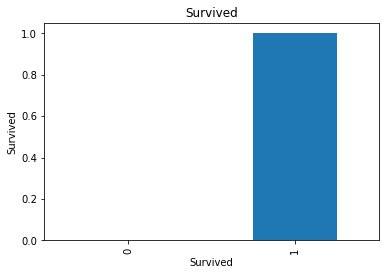

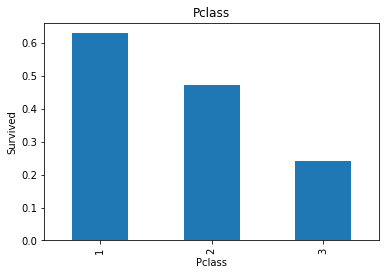

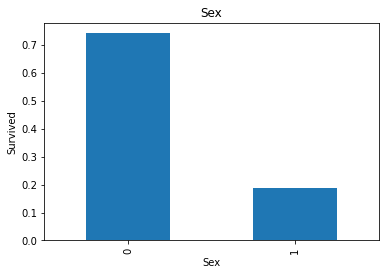

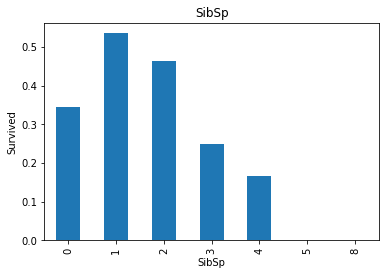

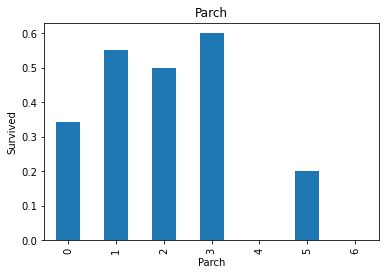

In [16]:
for feature in discrete_feature:
    dataset = df.copy()
    
    dataset.groupby(feature)['Survived'].mean().plot.bar()
    plt.xlabel(feature)
    plt.ylabel("Survived")
    plt.title(feature)
    plt.show()

#### Continous Numerical features

In [17]:
continous_feature = [feature for feature in numerical_feature if feature not in discrete_feature]
print(f"Total number of continous features are: {len(continous_feature)}")
print(continous_feature)

Total number of continous features are: 3
['PassengerId', 'Age', 'Fare']


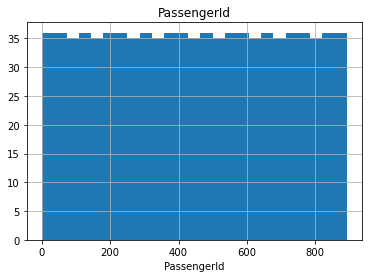

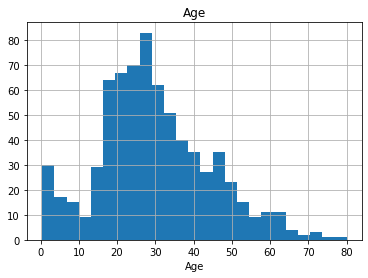

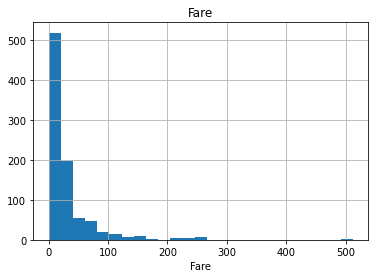

In [18]:
for feature in continous_feature:
    data = df.copy()
    
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.title(feature)
    plt.show()

Age feature in normally distributed but Fare feature is not distributed normally

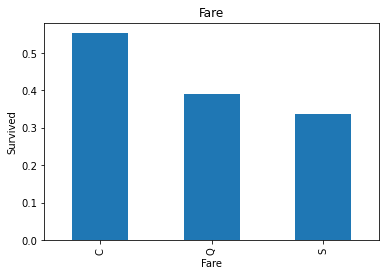

In [19]:
data = df.copy()
data.groupby(['Embarked'])['Survived'].mean().plot.bar()
plt.xlabel(feature)
plt.ylabel("Survived")
plt.title(feature)
plt.show()

In [20]:
df['Embarked'].replace({
    'C' : 2,
    'Q' : 1, 
    'S' : 0
}, inplace=True)

In [21]:
df['Embarked'].unique()

array([ 0.,  2.,  1., nan])

In [22]:
df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [23]:
def random_imputataion(df, variable):
    random_sample = df[variable].dropna().sample(df[variable].isnull().sum(), random_state=0)
    # Matching the index with the random_sample
    random_sample.index = df[df[variable].isnull()].index
    
    df.loc[df[variable].isnull(), variable] = random_sample;

In [24]:
random_imputataion(df, 'Age')

In [25]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,2.0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,0.0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,0.0


In [26]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [27]:
random_imputataion(df, 'Embarked')

In [28]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

All missing values or nan values are handled using random sample imputation method

In [29]:
X = df.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis=1)

In [30]:
X.shape

(891, 7)

In [31]:
Y = df['Survived']

In [32]:
Y.shape

(891,)

In [33]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso

In [34]:
feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=0))

In [35]:
feature_sel_model.fit(X, Y)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [36]:
feature_sel_model.get_support()

array([ True,  True,  True,  True,  True,  True,  True])

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

In [39]:
X_train.shape, y_train.shape

((668, 7), (668,))

In [40]:
X_test.shape, y_test.shape

((223, 7), (223,))

In [41]:
from sklearn.model_selection import GridSearchCV

In [42]:
n_estimators = [int(x) for x in np.linspace(start=100, stop=1500, num=10)]
criterion = ['gini', 'entropy' 'log_loss']
max_depth = [None]
min_samples_split = [2, 5, 6, 8, 9, 10, 14]
min_samples_leaf = [1, 2, 4, 6, 8, 10]
max_features = ['sqrt', 'log2', None]

In [43]:
param_distribution = {
    'n_estimators' : n_estimators,
    'criterion' : criterion,
    'max_depth' : max_depth,
    'min_samples_split' : min_samples_split,
    'min_samples_leaf' : min_samples_leaf,
    'max_features' : max_features
}

In [44]:
from sklearn.model_selection import KFold

In [45]:
cv = KFold(n_splits=3, shuffle=True, random_state=0)

In [46]:
from sklearn.ensemble import RandomForestClassifier

In [47]:
rf = RandomForestClassifier()

In [48]:
from sklearn.model_selection import RandomizedSearchCV

In [49]:
rf_randomcv = RandomizedSearchCV(estimator=rf, param_distributions=param_distribution,
                                n_iter=100, cv=cv, random_state=0, n_jobs=-1, verbose=2)

In [50]:
rf_randomcv.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


C:\Users\19138\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
168 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
168 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\19138\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\19138\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_forest.py", line 476, in fit
    trees = Parallel(
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterato

RandomizedSearchCV(cv=KFold(n_splits=3, random_state=0, shuffle=True),
                   estimator=RandomForestClassifier(), n_iter=100, n_jobs=-1,
                   param_distributions={'criterion': ['gini',
                                                      'entropylog_loss'],
                                        'max_depth': [None],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [1, 2, 4, 6, 8, 10],
                                        'min_samples_split': [2, 5, 6, 8, 9, 10,
                                                              14],
                                        'n_estimators': [100, 255, 411, 566,
                                                         722, 877, 1033, 1188,
                                                         1344, 1500]},
                   random_state=0, verbose=2)

In [51]:
best_params = rf_randomcv.best_params_

In [52]:
best_params

{'n_estimators': 411,
 'min_samples_split': 14,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': None,
 'criterion': 'gini'}

In [53]:
param_grid = {
    'criterion' : ['gini'],
    'max_depth' : [None],
    'max_features' : ['sqrt'],
    'min_samples_leaf' : [best_params['min_samples_leaf'], best_params['min_samples_leaf']+1,
                         best_params['min_samples_leaf']+2, best_params['min_samples_leaf']+3,
                         best_params['min_samples_leaf']+4, best_params['min_samples_leaf']+5],
    'min_samples_split' : [best_params['min_samples_split']-2, best_params['min_samples_split']-1,
                          best_params['min_samples_split'], best_params['min_samples_split']+1,
                          best_params['min_samples_split']+2],
    'n_estimators' : [best_params['n_estimators']-200, best_params['n_estimators']-100,
                     best_params['n_estimators'], best_params['n_estimators']+100,
                     best_params['n_estimators']+200]
}

In [54]:
grid_searchcv = GridSearchCV(estimator=rf, param_grid=param_grid, cv=cv, n_jobs=-1, verbose=2)

In [55]:
grid_searchcv.fit(X_train, y_train)

Fitting 3 folds for each of 150 candidates, totalling 450 fits


GridSearchCV(cv=KFold(n_splits=3, random_state=0, shuffle=True),
             estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_depth': [None],
                         'max_features': ['sqrt'],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6],
                         'min_samples_split': [12, 13, 14, 15, 16],
                         'n_estimators': [211, 311, 411, 511, 611]},
             verbose=2)

In [56]:
best_estimator = grid_searchcv.best_estimator_

In [57]:
best_estimator

RandomForestClassifier(min_samples_split=12, n_estimators=311)

In [58]:
import pickle

In [59]:
pickle.dump(best_estimator, open('classifier.pkl', 'wb'))

In [60]:
loaded_model = pickle.load(open('classifier.pkl', 'rb'))

In [61]:
loaded_model

RandomForestClassifier(min_samples_split=12, n_estimators=311)

In [62]:
from sklearn.metrics import accuracy_score

In [63]:
y_pred = loaded_model.predict(X_test)

In [64]:
print(accuracy_score(y_test, y_pred))

0.8430493273542601


In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [66]:
import pickle

In [67]:
load_model = pickle.load(open('classifier.pkl', 'rb'))

In [68]:
load_model

RandomForestClassifier(min_samples_split=12, n_estimators=311)

In [69]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [71]:
y_pred.shape, X_test.shape

((223,), (223, 7))

In [72]:
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

print(confusion_matrix(y_test, y_pred))

0.8430493273542601
              precision    recall  f1-score   support

           0       0.85      0.91      0.88       139
           1       0.83      0.74      0.78        84

    accuracy                           0.84       223
   macro avg       0.84      0.82      0.83       223
weighted avg       0.84      0.84      0.84       223

[[126  13]
 [ 22  62]]


In [73]:
test_data = pd.read_csv('test.csv')

In [74]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [75]:
test_data['Embarked'].replace({
    'C' : 2,
    'Q' : 1, 
    'S' : 0
}, inplace=True)

In [76]:
test_data['Embarked'].unique()

array([1, 0, 2], dtype=int64)

In [77]:
random_imputataion(test_data, 'Age')

In [78]:
random_imputataion(test_data, 'Fare')

In [79]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [82]:
X_final = np.array(test_data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1))

In [83]:
X_final.shape

(418, 7)

In [85]:
test_data['Sex'].replace({
    'male' : 1,
    'female' : 0
}, inplace=True)

In [86]:
X_final = np.array(test_data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1))

In [87]:
X_final[0]

array([ 3.    ,  1.    , 34.5   ,  0.    ,  0.    ,  7.8292,  1.    ])

In [88]:
y_pred_final = loaded_model.predict(X_final)

C:\Users\19138\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [89]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,0
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,1
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,0


In [90]:
for feature in test_data:
    print(test_data[feature].unique())

[ 892  893  894  895  896  897  898  899  900  901  902  903  904  905
  906  907  908  909  910  911  912  913  914  915  916  917  918  919
  920  921  922  923  924  925  926  927  928  929  930  931  932  933
  934  935  936  937  938  939  940  941  942  943  944  945  946  947
  948  949  950  951  952  953  954  955  956  957  958  959  960  961
  962  963  964  965  966  967  968  969  970  971  972  973  974  975
  976  977  978  979  980  981  982  983  984  985  986  987  988  989
  990  991  992  993  994  995  996  997  998  999 1000 1001 1002 1003
 1004 1005 1006 1007 1008 1009 1010 1011 1012 1013 1014 1015 1016 1017
 1018 1019 1020 1021 1022 1023 1024 1025 1026 1027 1028 1029 1030 1031
 1032 1033 1034 1035 1036 1037 1038 1039 1040 1041 1042 1043 1044 1045
 1046 1047 1048 1049 1050 1051 1052 1053 1054 1055 1056 1057 1058 1059
 1060 1061 1062 1063 1064 1065 1066 1067 1068 1069 1070 1071 1072 1073
 1074 1075 1076 1077 1078 1079 1080 1081 1082 1083 1084 1085 1086 1087
 1088 

In [91]:
best_estimator.predict(X_final)

C:\Users\19138\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [92]:
id_col = np.array(test_data['PassengerId'])

In [93]:
dataFrame = pd.DataFrame([id_col, y_pred_final])

In [95]:
dataFrame = dataFrame.T

In [96]:
dataFrame.rename(columns={0: 'PassengerId', 1: 'Survived'}, inplace=True)

In [97]:
dataFrame

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [98]:
dataFrame.to_csv('gender_submission.csv', index=False)